#**Group Project: Income Prediction**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Introduction

### Background

the background is

### Dataset Overview

....

## 2. Data Preprocessing

### Import labraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
pandas version: 1.1.5
matplotlib version: 3.2.2
NumPy version: 1.19.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 1.0.1
-------------------------


In [ ]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

### General Data Exploration

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/DMGroup/adult.csv')
#df = pd.read_csv('/content/sample_data/adult.csv')
df= pd.read_csv('adult.csv')

In [ ]:
# Print the info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
# na = ?, so we need to change 
df = df.replace(r'\s+',np.nan,regex=True).replace('?',np.nan)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
print('Data columns with null values:\n', df.isna().sum())

Data columns with null values:
 age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [ ]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [ ]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [ ]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

### Data Cleaning

In [ ]:
# Workclass and Occupation and native-country has null values. Need to fill these values
# Fill workclass with mode:
df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)

# Fill occupation with mode:
df['occupation'].fillna(df['occupation'].mode()[0],inplace=True)


# Fill native-country with mode:
df['native.country'].fillna(df['native.country'].mode()[0],inplace=True)

# Info of the transformed dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
print('Data columns with null values:\n', df.isna().sum())

Data columns with null values:
 age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [ ]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
# As we can all see, the feature education is redundant since we already have educational-num feature
# Therefore, we can drop the education column in the training set
df.drop(['education'],axis=1,inplace=True)

# Also we can drop fnlwgt also:
df.drop(['fnlwgt'],axis=1,inplace=True)
# There are only 13 features now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education.num   32561 non-null  int64 
 3   marital.status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  native.country  32561 non-null  object
 12  income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [ ]:
df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# We replace 0 with income <=50K and 1 with income >= 50K
dict1 = {">50K": 1, "<=50K": 0}
df = df.replace({"income": dict1})
df[['income']]

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,1
32559,0


## 3. EDA

income
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

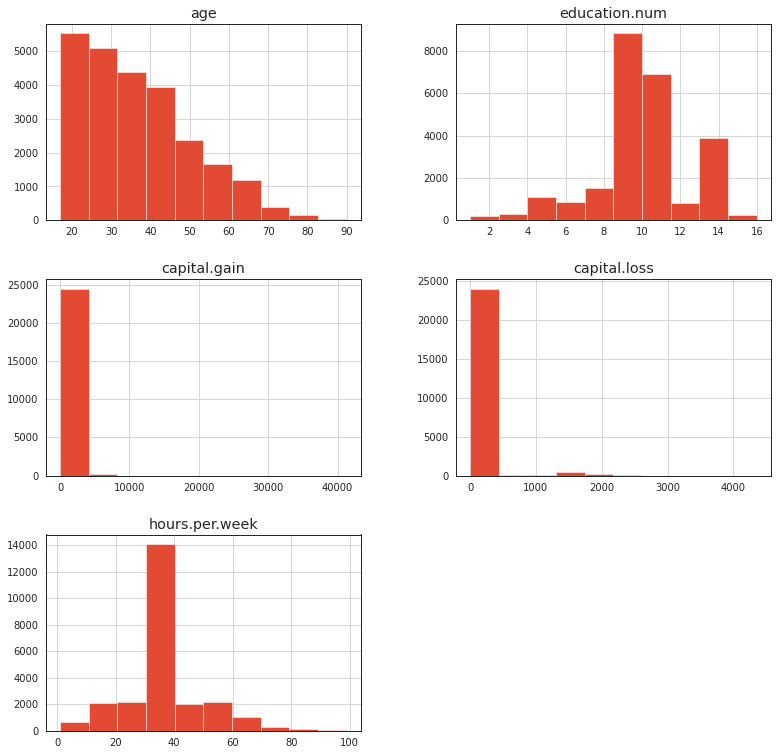

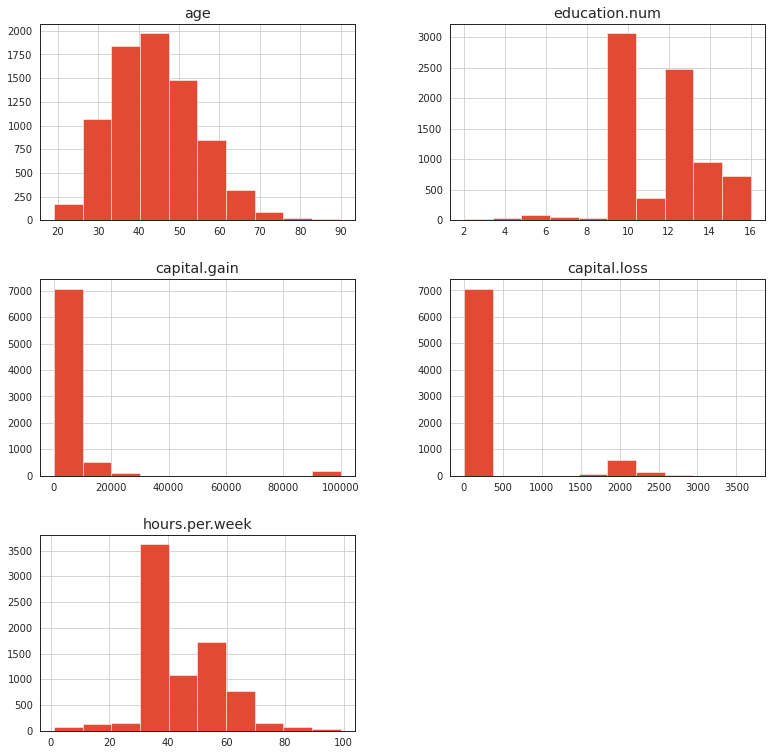

In [ ]:
df.groupby('income').hist(figsize=(13, 13))



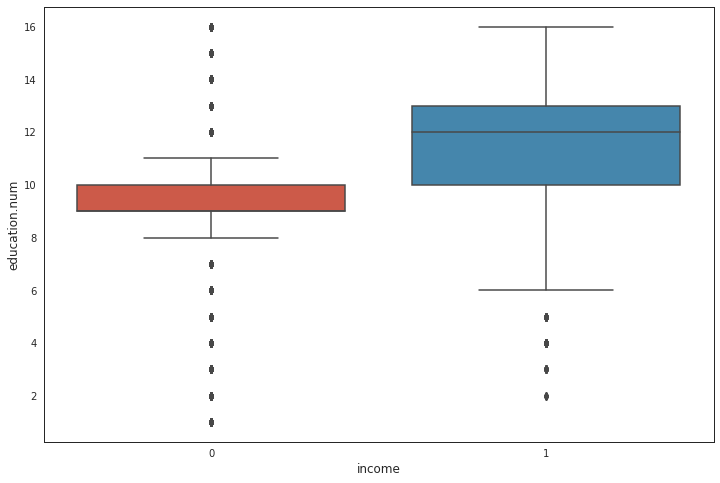

In [ ]:
# Explore education.num vs income
sns.boxplot(x = 'income', y = 'education.num', data=df)

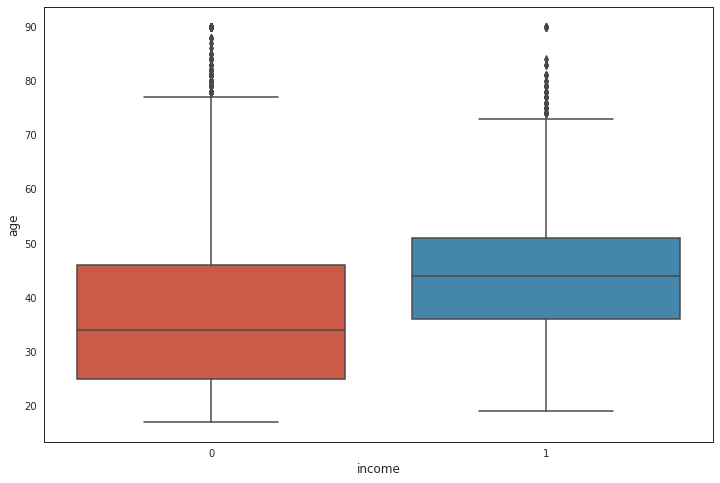

In [ ]:
# Explore age vs income
sns.boxplot(x='income', y='age',data=df)
# Result shows that age is an important feature since people with income >50K will have an older population compared to people with income <50K

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

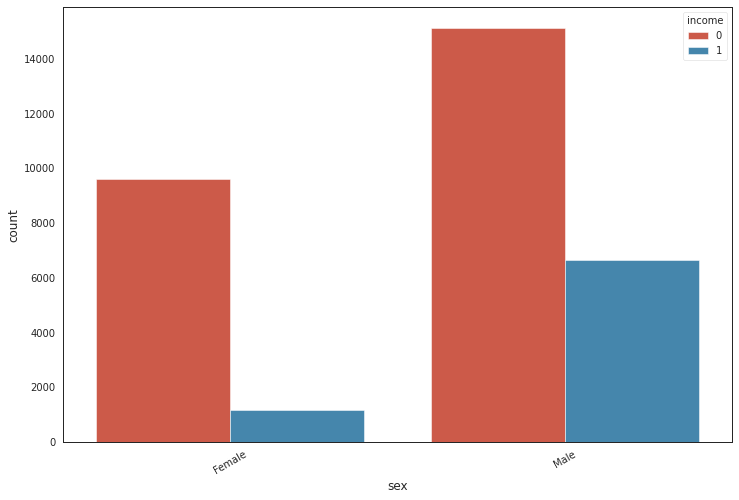

In [ ]:
# Explore sex vs income
ax= sns.countplot(data=df, x='sex', hue='income')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
# Results shows that age is important feature since the proportional of male to female is different for income <50K and >50K

[Text(0, 0, 'Private'),
 Text(0, 0, 'State-gov'),
 Text(0, 0, 'Federal-gov'),
 Text(0, 0, 'Self-emp-not-inc'),
 Text(0, 0, 'Self-emp-inc'),
 Text(0, 0, 'Local-gov'),
 Text(0, 0, 'Without-pay'),
 Text(0, 0, 'Never-worked')]

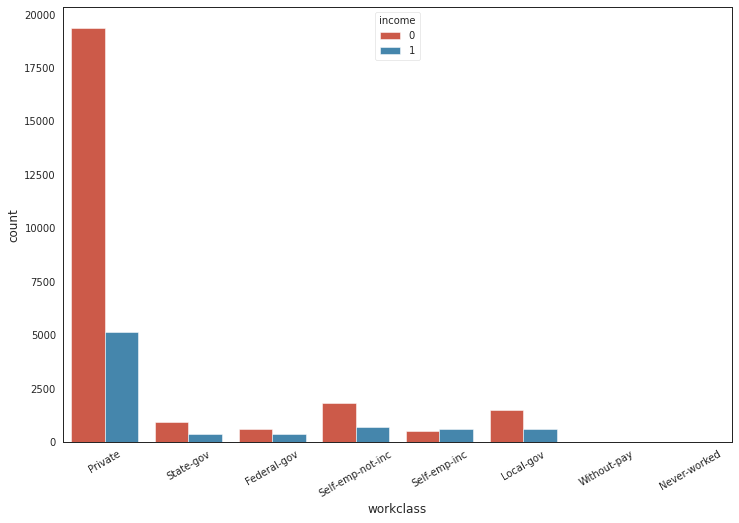

In [ ]:
# Explore workclass vs income:
ax= sns.countplot(data=df, x='workclass', hue='income')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# So people in private sector faces a significant difference in their pay, most of private sectors earn less than 50K

[Text(0, 0, 'Widowed'),
 Text(0, 0, 'Divorced'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Never-married'),
 Text(0, 0, 'Married-civ-spouse'),
 Text(0, 0, 'Married-spouse-absent'),
 Text(0, 0, 'Married-AF-spouse')]

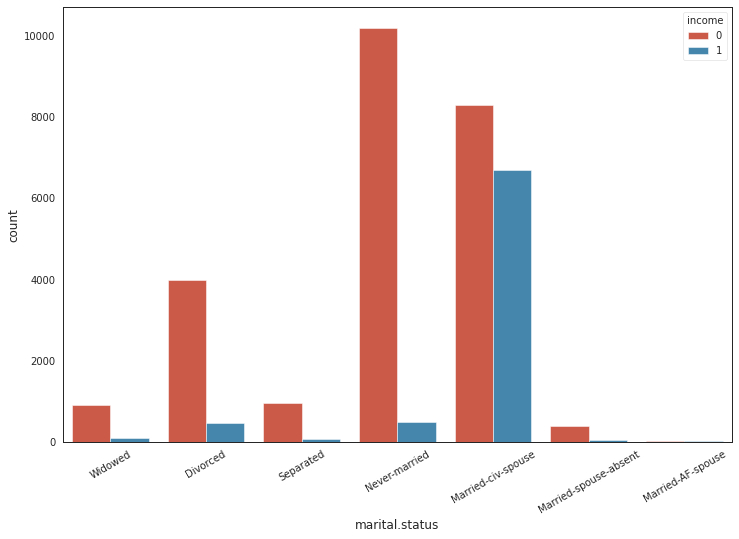

In [ ]:
# Explore maritial status vs income:
ax=sns.countplot(data=df, x='marital.status', hue='income')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# Results show that never married individuals will most likely to earn less than 50K. The same with divorced people. However,
# there is not much different between the number of married people earn less than 50k or earn more than 50K

[Text(0, 0, 'Prof-specialty'),
 Text(0, 0, 'Exec-managerial'),
 Text(0, 0, 'Machine-op-inspct'),
 Text(0, 0, 'Other-service'),
 Text(0, 0, 'Adm-clerical'),
 Text(0, 0, 'Craft-repair'),
 Text(0, 0, 'Transport-moving'),
 Text(0, 0, 'Handlers-cleaners'),
 Text(0, 0, 'Sales'),
 Text(0, 0, 'Farming-fishing'),
 Text(0, 0, 'Tech-support'),
 Text(0, 0, 'Protective-serv'),
 Text(0, 0, 'Armed-Forces'),
 Text(0, 0, 'Priv-house-serv')]

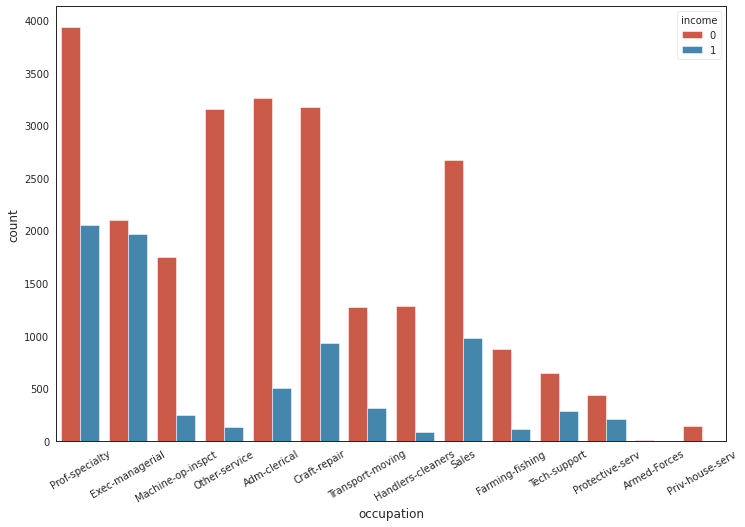

In [ ]:
# Explore occupation vs income
#sns.countplot(data=df, x='occupation', hue='income')
#plt.setp(plt.get_xticklabels(), rotation=90)
ax = sns.countplot(data=df, x='occupation', hue='income')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#Results show that prof-specialty individuals, Machine-op-inspct, Adm-clerica, Craft-repair, Sales will most likely to earn less than 50K. 

[Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Asian-Pac-Islander'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Amer-Indian-Eskimo')]

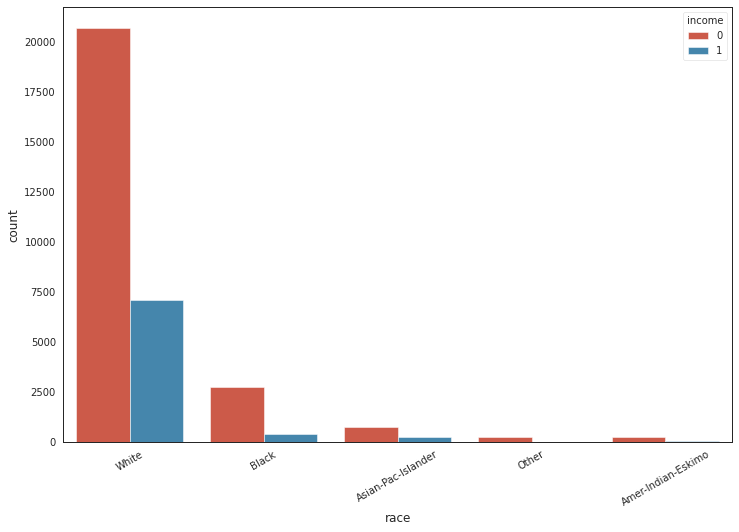

In [ ]:
# Explore race vs income
ax = sns.countplot(data=df, x='race', hue='income')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#Results show that most of the population is white, and there are few data for the other races 

[Text(0, 0, 'Not-in-family'),
 Text(0, 0, 'Unmarried'),
 Text(0, 0, 'Own-child'),
 Text(0, 0, 'Other-relative'),
 Text(0, 0, 'Husband'),
 Text(0, 0, 'Wife')]

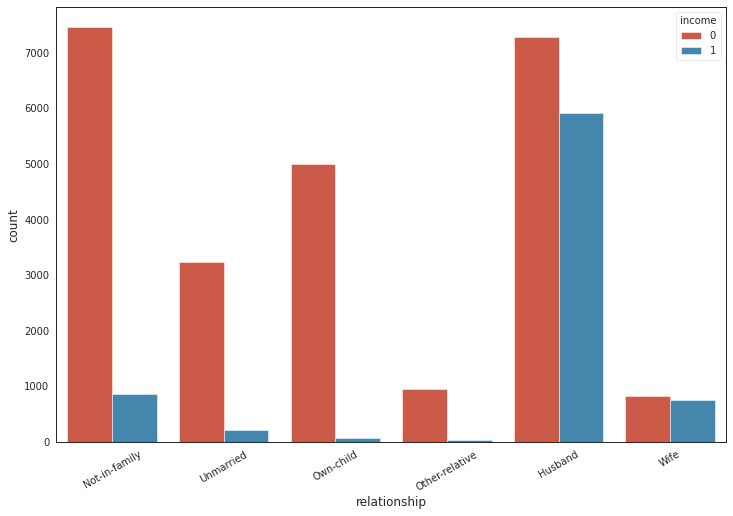

In [ ]:
# Explore relationship vs income
ax = sns.countplot(data=df, x='relationship', hue='income')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#Results show that most of the population is white, and there are few data for the other races 

[Text(0, 0, 'United-States'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Taiwan'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Trinadad&Tobago'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'South'),
 Text(0, 0, 'Holand-Netherlands'),
 Text(0, 0, 'Puerto-Rico'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'England'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Hong'),
 Text(0, 0, 'Honduras'),
 Text(0, 0, 'Cuba'),
 Text(0, 0, 'Ireland'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Peru'),
 Text(0, 0, 'Nicaragua'),
 Text(0, 0, 'Dominican-Republic'),
 Text(0, 0, 'Haiti'),
 Text(0, 0, 'El-Salvador'),
 Text(0, 0, 'Hungary'),
 Text(0, 0, 'Columbia'),
 Text(0, 0, 'Guatemala'),
 Text(0, 0, 'Jamaica'),
 Text(0, 0, 'Ecuador'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Yugoslavia'),
 Text(0, 0, 'Scotland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Laos'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 

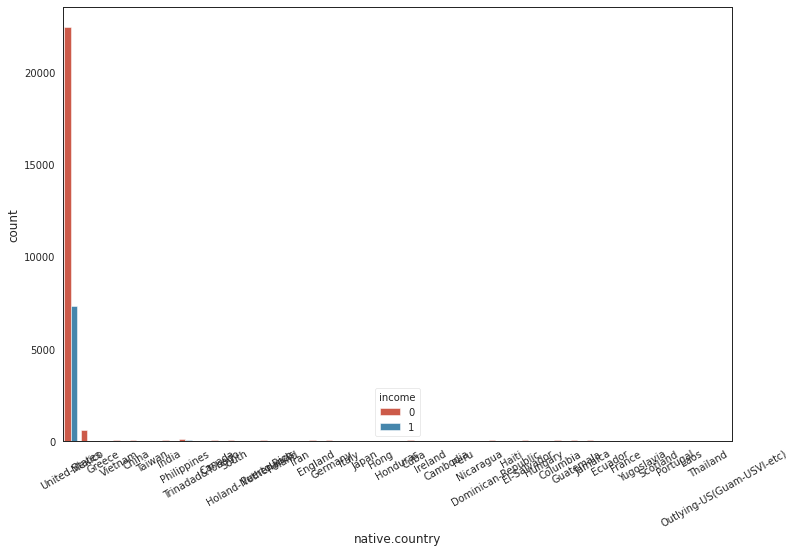

In [ ]:
ax = sns.countplot(data=df, x='native.country', hue='income')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

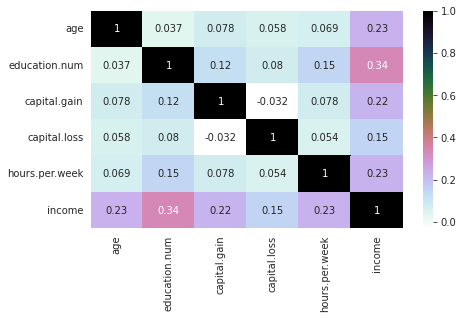

In [ ]:
# Plot heatmap which shows correlations between continuous features
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

# Result shows that there are little correlation between the features. The highest correlation is 0.34 between income and education.num.
# Therefore there are no redundant continuous features.

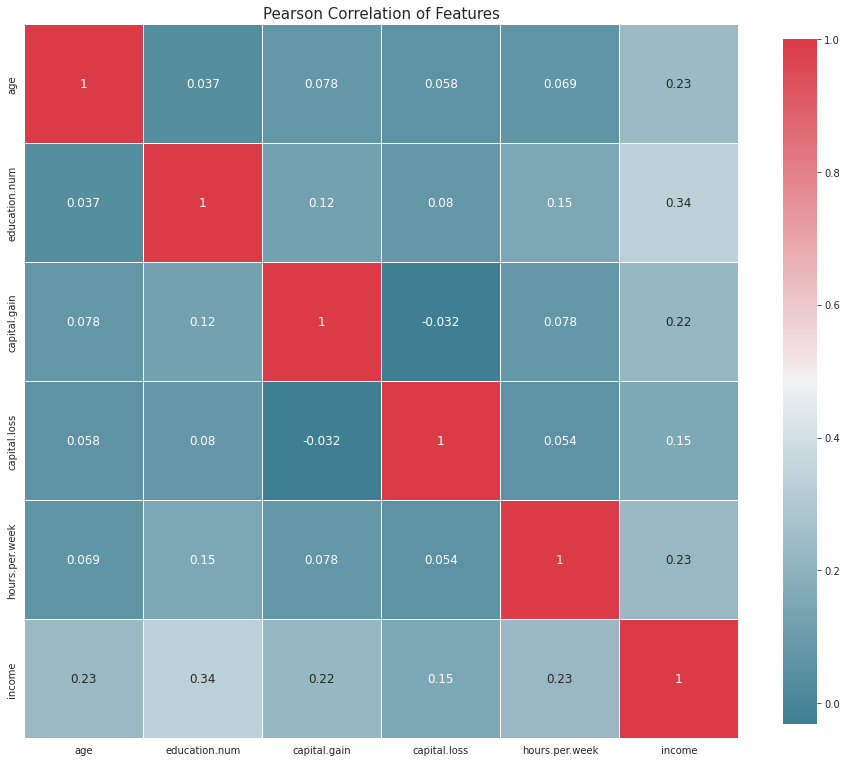

In [ ]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(16, 14))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

## 4. Model 

### Data Engineering

In [ ]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [ ]:
df_ml = df.copy()

In [ ]:
df_ml =  df.drop(columns=['native.country','race'])

In [ ]:
df_ml.head()

,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,Female,0,4356,40,0
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,0
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Female,0,4356,40,0
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,0
4,41,Private,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,0


In [ ]:
df_ml = pd.get_dummies(df_ml, columns=['workclass','marital.status','occupation','relationship','sex'])
df_ml.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male
0,90,9,0,4356,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,82,9,0,4356,18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,66,10,0,4356,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,54,4,0,3900,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,41,10,0,3900,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('income', axis=1)
y = df_ml['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

(6513, 42)

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler

# num_col_names = ['age','education.num','capital.gain','capital.loss','hours.per.week']
# num_features = X_train[num_col_names]
# test_num_features = X_test[num_col_names]

# ct = ColumnTransformer([
#         ('somename', StandardScaler(), ['age','education.num','capital.gain','capital.loss','hours.per.week'])
#     ], remainder='passthrough')

# features = ct.fit_transform(num_features)
# test_feature = ct.transform(test_num_features)
# X_train[num_col_names] = features
# X_test[num_col_names] = test_feature

### Models

In [ ]:
# Import some evaluation functions
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,roc_auc_score, classification_report, recall_score, f1_score
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, plot_roc_curve, roc_curve, plot_confusion_matrix

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [ ]:
models = ['DT','RF','XGB','LGBM']
accuracy = []

In [ ]:
train_models = ['KNN','DecisionTree','RandomForest','XGB','LGBM','GNB','BNB','SVC']
model_accuracy = []

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4927
           1       0.76      0.59      0.66      1586

    accuracy                           0.86      6513
   macro avg       0.82      0.76      0.79      6513
weighted avg       0.85      0.86      0.85      6513

0.7646050368162052


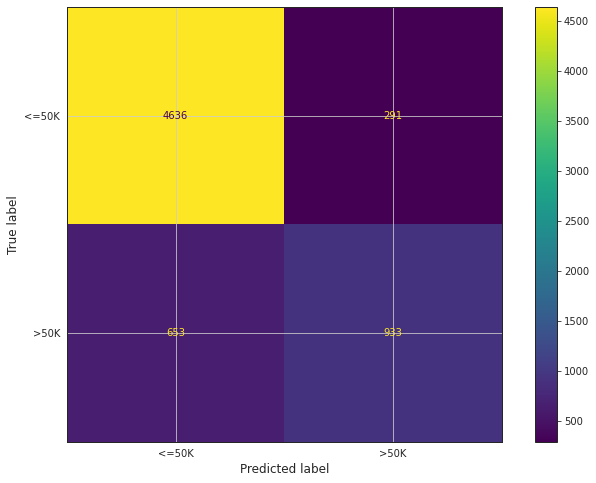

In [ ]:
from sklearn import neighbors

knn_model = neighbors.KNeighborsClassifier(n_neighbors=20, metric='manhattan', weights='uniform')
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)

model_accuracy.append(accuracy_score(y_test, pred_knn))

plot_confusion_matrix(knn_model, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)

print(classification_report(y_test, pred_knn, zero_division=0))
print(balanced_accuracy_score(y_test, pred_knn))


              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4927
           1       0.60      0.62      0.61      1586

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513

0.7432947259496852


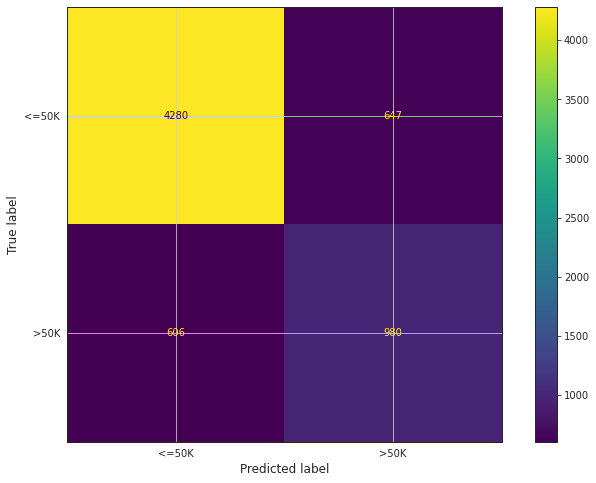

In [ ]:
from sklearn.tree import DecisionTreeClassifier         
weights = {0:1, 1:3}
decision_tree_model = DecisionTreeClassifier(class_weight=weights)
decision_tree_model.fit(X_train, y_train)
dt_pred = decision_tree_model.predict(X_test)

model_accuracy.append(accuracy_score(y_test, dt_pred))

plot_confusion_matrix(decision_tree_model, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test, dt_pred, zero_division=0))

print(balanced_accuracy_score(y_test, dt_pred))

#">50K": 1, "<=50K"

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4927
           1       0.70      0.59      0.64      1586

    accuracy                           0.84      6513
   macro avg       0.79      0.75      0.77      6513
weighted avg       0.83      0.84      0.83      6513

0.7529022083068538


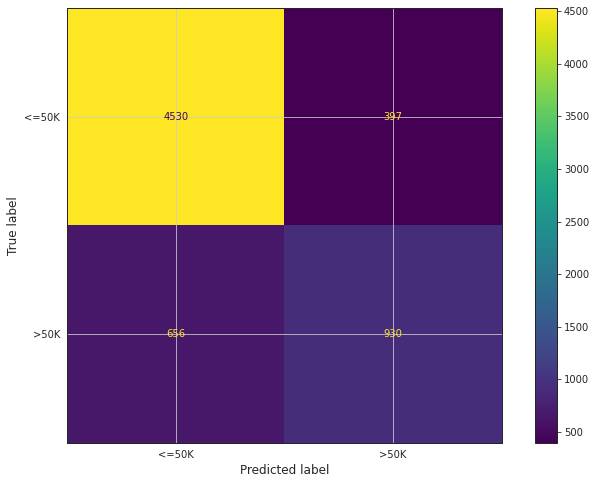

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

model_accuracy.append(accuracy_score(y_test, rf_pred))

plot_confusion_matrix(rf, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test, rf_pred, zero_division=0))

print(balanced_accuracy_score(y_test, rf_pred))

# balanced_accuracy.append(balanced_accuracy_score(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4927
           1       0.79      0.57      0.66      1586

    accuracy                           0.86      6513
   macro avg       0.83      0.76      0.79      6513
weighted avg       0.85      0.86      0.85      6513

0.7614607698629499


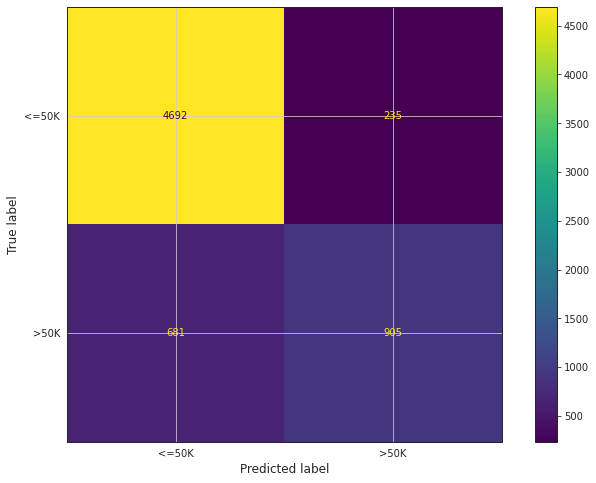

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

model_accuracy.append(accuracy_score(y_test, xgb_pred))

plot_confusion_matrix(xgb, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test, xgb_pred, zero_division=0))

print(balanced_accuracy_score(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      4927
           1       0.60      0.85      0.70      1586

    accuracy                           0.82      6513
   macro avg       0.77      0.83      0.79      6513
weighted avg       0.86      0.82      0.83      6513



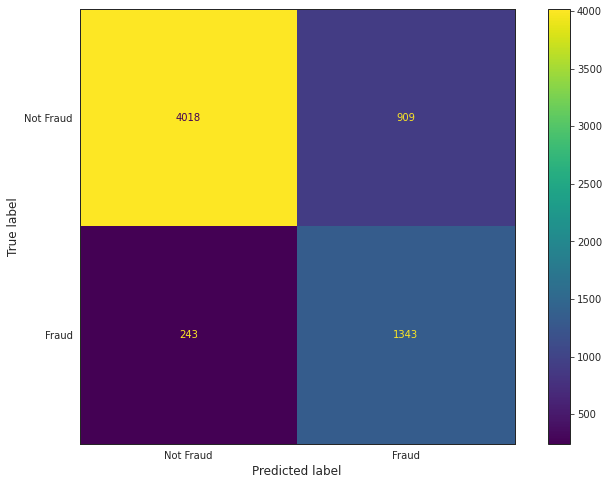

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(
          # max_bin = 63,
          max_depth = 63, num_leaves = 255, num_iterations = 500,
          learning_rate = 0.01, tree_learner = 'serial', is_dfing_metric = False,
          min_data_in_leaf = 1, min_sum_hessian_in_leaf = 100, sparse_threshold=1.0,
          # device = 'gpu',
          num_thread = -1, save_binary= True, seed= 42, feature_fraction_seed = 42,
          bagging_seed = 42, drop_seed = 42, data_random_seed = 42,
          objective = 'binary', boosting_type = 'gbdt',
          verbose = 1, metric = 'auc',is_unbalance = True,
          # scale_pos_weight = 98,
          boost_from_average = False,
)


lgb.fit(X_train, y_train)

lgb_pred = lgb.predict(X_test)

model_accuracy.append(accuracy_score(y_test, lgb_pred))


plot_confusion_matrix(lgb, X_test, y_test, values_format = '', 
                      display_labels=['Not Fraud', 'Fraud'])
print(classification_report(y_test, lgb_pred, zero_division=0))

# balanced_accuracy.append(balanced_accuracy_score(y_test, lgb_pred))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Try to tune the number of neighbors k for k-NN:

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 25)}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=10, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


KeyboardInterrupt: ignored

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      4927
           1       0.56      0.80      0.66      1586

    accuracy                           0.80      6513
   macro avg       0.74      0.80      0.76      6513
weighted avg       0.83      0.80      0.81      6513

0.7965883871740527


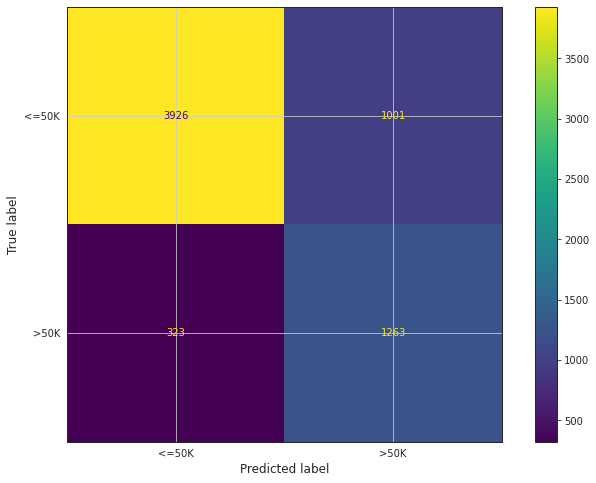

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

model_accuracy.append(accuracy_score(y_test, gnb_pred))

plot_confusion_matrix(gnb, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test, gnb_pred, zero_division=0))

print(balanced_accuracy_score(y_test, gnb_pred))



              precision    recall  f1-score   support

           0       0.91      0.72      0.80      4927
           1       0.47      0.79      0.59      1586

    accuracy                           0.74      6513
   macro avg       0.69      0.75      0.70      6513
weighted avg       0.81      0.74      0.75      6513

0.7542855194029553


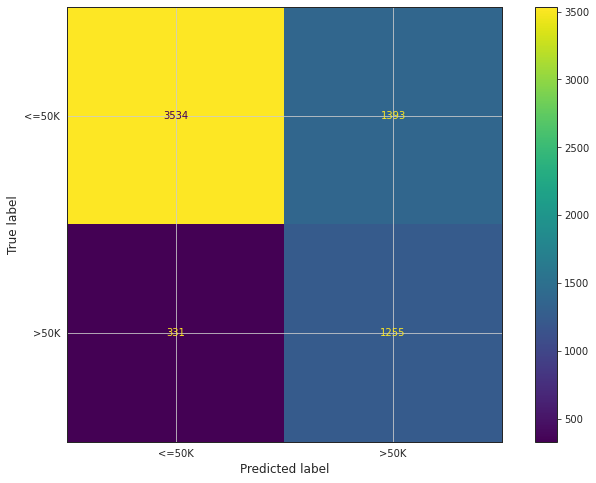

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)

model_accuracy.append(accuracy_score(y_test, bnb_pred))

plot_confusion_matrix(bnb, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test, bnb_pred, zero_division=0))

print(balanced_accuracy_score(y_test, bnb_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4927
           1       0.73      0.27      0.39      1586

    accuracy                           0.80      6513
   macro avg       0.77      0.62      0.64      6513
weighted avg       0.79      0.80      0.76      6513

0.6189073589155772


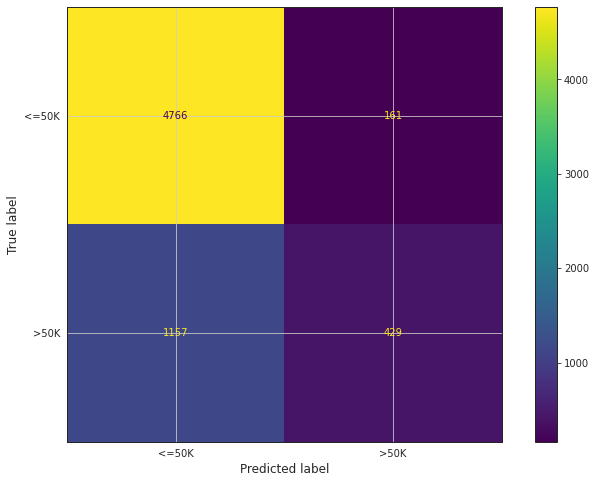

In [ ]:
from sklearn import svm

svc = svm.SVC(probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

model_accuracy.append(accuracy_score(y_test, svc_pred))

plot_confusion_matrix(svc, X_test, y_test, values_format = '', 
                      display_labels=['<=50K', '>50K'])
plt.grid(None)
print(classification_report(y_test, svc_pred, zero_division=0))

print(balanced_accuracy_score(y_test, svc_pred))

In [ ]:
# List the accuracy of all the models

tr_split = pd.DataFrame({'Models': train_models, 'Accuracy': model_accuracy})
print(tr_split)

         Models  Accuracy
0           KNN  0.855059
1  DecisionTree  0.807616
2  RandomForest  0.838323
3           XGB  0.859358
4          LGBM  0.823123
5           GNB  0.796714
6           BNB  0.735299
7           SVC  0.797635


In [ ]:
X_train.head()
print(X_train.columns)

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital.status_Divorced', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech

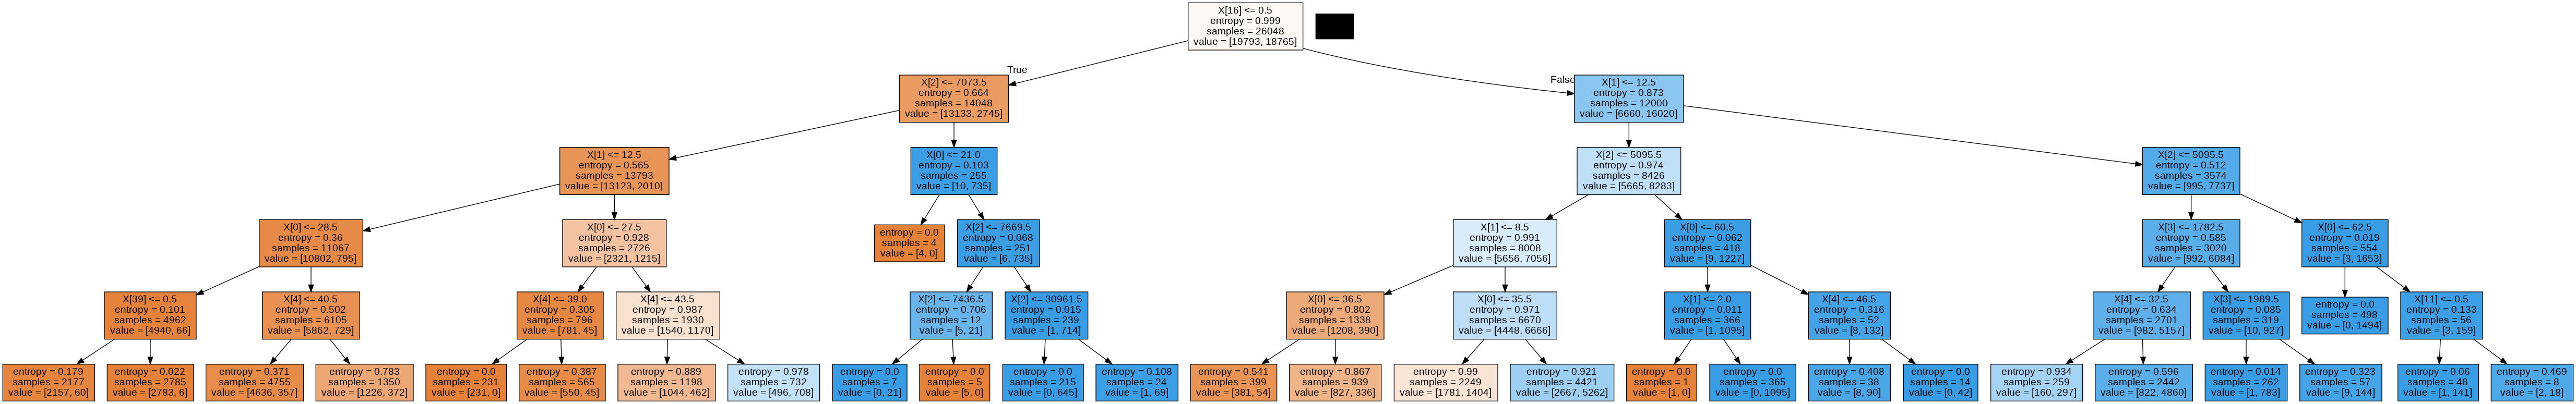

In [ ]:
from sklearn.tree import DecisionTreeClassifier         

# Try to visualize the Dicision Tree

weights = {0:1, 1:3}
# decision_tree_model = DecisionTreeClassifier(class_weight=weights)
decision_tree_model = DecisionTreeClassifier(criterion='entropy', class_weight=weights, max_depth=5, random_state=17)
decision_tree_model.fit(X_train, y_train)
dt_pred = decision_tree_model.predict(X_test)

tree_str = export_graphviz(decision_tree_model, feature_names=None, filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(tree_str)
graph.write_png('tree.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "tree.png"
Image(filename = PATH , width=2000, height=600)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Try to find best parameters for Decision Tree

weights = {0:1, 1:3}
# decision_tree_model = DecisionTreeClassifier(class_weight=weights)
decision_tree_model = DecisionTreeClassifier(criterion='entropy', class_weight=weights, max_depth= 3, random_state=17)
decision_tree_model.fit(X_train, y_train)
dt_pred = decision_tree_model.predict(X_test)


tree_params = {'max_depth': range(1,15), 'max_features': range(4,30)}

tree_grid = GridSearchCV(decision_tree_model, tree_params, cv=10, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)


Fitting 10 folds for each of 364 candidates, totalling 3640 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 3},
                                              criterion='entropy', max_depth=3,
                                              random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'max_features': range(4, 30)},
             verbose=True)

In [ ]:
print (f"Best parameters are {tree_grid.best_params_}") 

Best parameters are {'max_depth': 12, 'max_features': 15}


In [ ]:
tree_grid.best_score_ #

0.8143814919317984

Using CNN for the cells below:

In [ ]:
# Import important libraries
import torch
from torch import nn
from torch.utils import data

In [ ]:
# Convert training and test dataframes to tensors:
X_train.shape

X_train_t=torch.tensor(X_train.values) 
y_train_t=torch.tensor(y_train.values)
X_test_t=torch.tensor(X_test.values)
y_test_t= torch.tensor(y_test.values)

def load_array(data_arrays, batch_size, is_train=True):  
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
train_iter = load_array((X_train_t, y_train_t), batch_size)
test_iter = load_array((X_test_t, y_test_t), batch_size)

# define a network that has two layers, Flatten, then Linear, Flatten reshapes images to vectors
# AND initialize weights: set the weights according to Xavier scaling
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # layers here
        self.net= nn.Sequential(nn.Flatten(),nn.Linear(input_dim,output_dim))
        torch.nn.init.xavier_uniform_(self.net[1].weight)
        # initialize here
    def forward(self, x):    
        x= self.net(x)
        return x

## 5. Conclusion